# Scientific Programming

### BUSI 520 - Python for Business Research
### Kerry Back, JGSB, Rice University

* Optimization
* Solving (systems of) nonlinear equations
* Nonlinear regression
* Numerical integration and ODEs
* Interpolation and extrapolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
colors = sns.color_palette()

In [2]:
import matplotlib as mpl
SLIDES = False
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['font.size'] = 10 + 2*SLIDES
mpl.rcParams['axes.titlesize'] = 14 + 2*SLIDES
mpl.rcParams['axes.labelsize'] = 12 + 2*SLIDES
mpl.rcParams['xtick.labelsize'] = 10 + 2*SLIDES
mpl.rcParams['ytick.labelsize'] = 10 + 2*SLIDES
mpl.rcParams['legend.fontsize'] = 10 + 2*SLIDES
mpl.rcParams['legend.title_fontsize'] = 0

### scipy.optimize.minimize

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

There is no guarantee of finding a global optimum.  It can be surprisingly difficult to find optima in higher dimensions ("curse of dimensionality").  Different algorithms have various advantages and disadvantages.

In [11]:
from scipy.optimize import minimize
# Define a simple function for optimization example
def func(x):
    return x**2 + x + 2

# Minimize the function using scipy.optimize.minimize
result = minimize(func, x0=0)
min_point = result.x
min_value = result.fun
print(f"minimum value is {min_value:.2f} and argmin is {min_point[0]:.2f}")

minimum value is 1.75 and argmin is -0.50


In [16]:
# Define a function of two variables
def func(x):
    x0, x1 = x
    return (x0 - 1)**2 + (x1 - 2.5)**2

# Define bounds for the variables
bounds = [(2, 3), (0, 1)]

# Minimize the function with bounds
result = minimize(func, x0=[1, 2], bounds=bounds)
min_point = result.x
min_value = result.fun

print(f"minimum value is {min_value:.2f} and argmin is {np.round(min_point, 2)}")

minimum value is 3.25 and argmin is [2. 1.]


In [24]:
# Define a function of three variables
def func(x):
    x0, x1, x2 = x
    return x0*x1 - x1*x2

# Define constraints
def constraint1(x):
    x0, x1, x2 = x
    return x0 + x1 - 2

def constraint2(x):
    x0, x1, x2 = x
    return x1**2 + x2**2 - 1

constraints = (
    {'type': 'eq', 'fun': constraint1},
    {'type': 'eq', 'fun': constraint2}
)

# Minimize the function with constraints
result = minimize(func, x0=[0, 0, 0], constraints=constraints)
min_point = result.x
min_value = result.fun

print(f"minimum value is {min_value:.2f} and argmin is {np.round(min_point, 2)}")

minimum value is 0.51 and argmin is [1.17 0.83 0.56]


### scipy.optimize.root

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html

For solving an equation $f(x)=0$ which can be a vector equation.  Again, there are various algorithms available, and the curse of dimensionality is a real thing.

In [40]:
from scipy.optimize import root

# A function of one variable
def func(x):
    return x**3 - 4*x**2 - 7*x + 10
result = root(func, x0=[0, 2, 3])

print(f"roots are {result.x}")

roots are [ 1.  1. -2.]


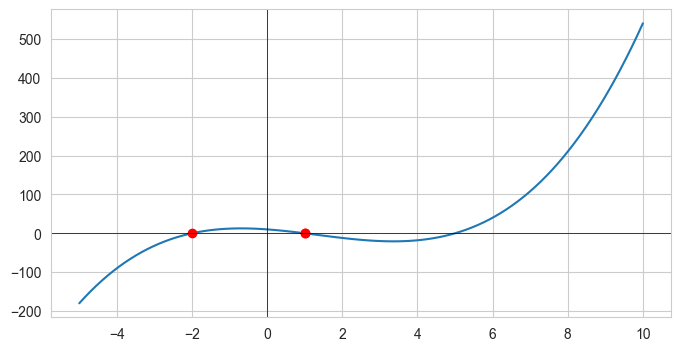

In [42]:
# Plot the function and the roots found
x = np.linspace(-5, 10, 100)
y = func(x)

plt.plot(x, y)
plt.plot(result.x, func(result.x), 'ro')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

In [43]:
# A function of two variables
def func(x):
    x0, x1 = x
    f1 = x0**2 + x1**2 - 1
    f2 = x0*x1 - 0.5
    return [f1, f2]

result = root(func, x0=[0.5, 0.5])
print(f"roots are {result.x}")

roots are [0.70710677 0.70710679]


### scipy.optimize.curve_fit

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

For nonlinear regression.  Can accommodate weighted least squares.  In the following example, we find parameters $a$ and $b$ to minimize the sum of squared errors
$$\sum_{i=1}^n \big[y_i - f(x_i | a, b)\big]^2$$ 
with $f(x|a, b) = a \cdot \sin(bx)$.  It provides a covariance matrix for the parameter estimates based on the delta method.

In [45]:
from scipy.optimize import curve_fit
# Generate data
np.random.seed(0)
x_data = np.linspace(-2, 2, 100)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=100)

# Functional form to fit
def func(x, a, b):
    return a * np.sin(b * x)

popt, pcov = curve_fit(func, x_data, y_data)
print(f"optimal parameters are {np.round(popt, 2)}")

optimal parameters are [2.79 1.51]


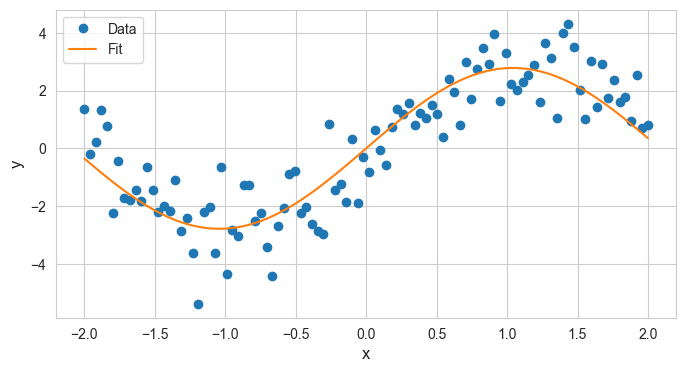

In [37]:
# Plot the data and the fit
y_fit = func(x_data, *popt)

plt.plot(x_data, y_data, 'o', label='Data')
plt.plot(x_data, y_fit, '-', label='Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### scipy.integrate

Various methods of computing numerical integrals of a given function or from a sample $(x_i, y_i)$ of data.  Also, for solving ordinary differential equations (ODEs).


In [48]:
from scipy.integrate import quad

# Define a function for which we want to find the integral
def func(x):
    return x**2 + x

# Find the integral of the function from x = 0 to x = 1
integral, error = quad(func, 0, 1)

# Display the result of the integration and the estimate of the absolute error
integral, error

(0.8333333333333335, 9.251858538542972e-15)

The scipy.stats module contains pdfs and cdfs for various distributions as well as random number generators.  In the next example, we compute the mean of a function of a normally distributed random variable by integrating the function multiplied by scipy.stats.norm.pdf(x).  We integrate from $-\infty$ to $+\infty$.

In [49]:
from scipy.stats import norm

# Define a function for which we want to find the integral
def func(x):
    return (x**2 + x) * norm.pdf(x)

# Find the integral of the function from x = -infinity to x = +infinity
integral, error = quad(func, -np.inf, np.inf)

# Display the result of the integration and the estimate of the absolute error
integral, error

(1.000000000000001, 5.274099867135772e-09)

### Solving an ODE

As an example, we'll solve a 2nd order ODE:
$$y''(t) - 2y'(t) + y(t) = \sin(t)$$
with initial conditions $y(0) = y'(0) = 0$.  Following a standard procedure, we recast this as a pair of 1st order ODEs by setting $y_1(t) = y(t)$ and $y_2(t) = y'(t)$.  The ODE is the pair of equations:
$$y_2(t) - y_1'(t) = 0$$
$$y_2'(t) - 2y_2(t) + y_1(t) =  \sin(t)$$
and the initial conditions are $y_1(0) = y_2(0) = 0$.

In [50]:
from scipy.integrate import solve_ivp

def diff_eq(t, y):
    y1, y2 = y
    dy1dt = y2
    dy2dt = 2*y2 - y1 + np.sin(t)
    return [dy1dt, dy2dt]

# Initial conditions: y(0) = 0, y'(0) = 0
y_init = [0, 0]

# Time span for the solution
t_span = [0, 10]

# Time points where solution is computed
t_eval = np.linspace(0, 10, 100)

solution = solve_ivp(diff_eq, t_span, y_init, t_eval=t_eval)

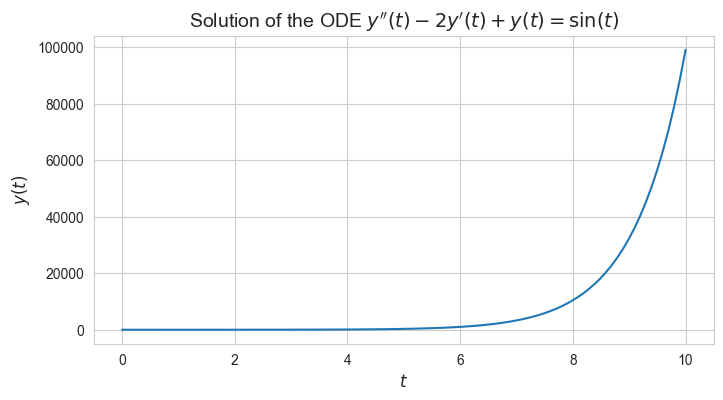

In [54]:
# solution.y[0] is y1 = y 
# solution.y[1] is y2 = y'

plt.plot(solution.t, solution.y[0])
plt.xlabel(r'$t$')
plt.ylabel(r'$y(t)$')
plt.title(r"Solution of the ODE $y''(t) - 2y'(t) + y(t) = \sin(t)$")
plt.show()

### Interpolation and Extrapolation

scipy.interpolate provides linear and spline interpolation and extrapolation.  A cubic spline is a piecewise cubic function with parameters chosen to produce a smooth function passing through given points.

In [57]:
from scipy.interpolate import interp1d, UnivariateSpline

# Generate synthetic data
x = np.linspace(0, 10, 10)
y = np.sin(x)

# Generate finer grid for interpolation
x_fine = np.linspace(0, 10, 1000)

In [60]:
# Linear interpolation
linear_interp = interp1d(x, y)
y_linear = linear_interp(x_fine)

# Spline interpolation 
spline_interp = UnivariateSpline(x, y, s=0)
y_spline = spline_interp(x_fine)

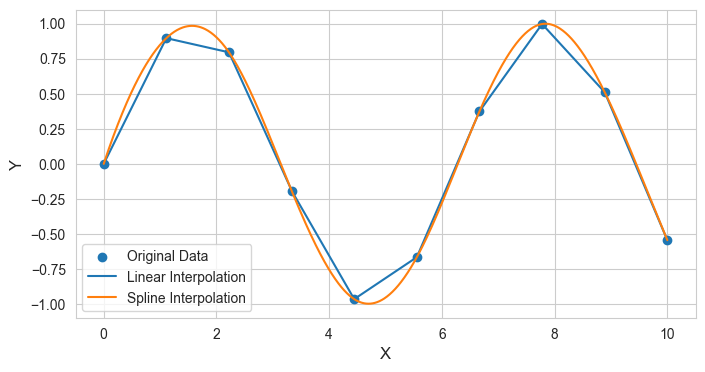

In [61]:
plt.scatter(x, y, label='Original Data')
plt.plot(x_fine, y_linear, label='Linear Interpolation')
plt.plot(x_fine, y_spline, label='Spline Interpolation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [68]:
# Generate grid to illustrate extrapolation
x_fine2 = np.linspace(-2, 12, 1000)

# Linear extrapolation
linear_extrap = interp1d(x, y, fill_value='extrapolate')
y_linear_extrap = linear_extrap(x_fine2)

# Spline extrapolation
spline_extrap = UnivariateSpline(x, y, s=0, ext='extrapolate')
y_spline_extrap = spline_extrap(x_fine2)

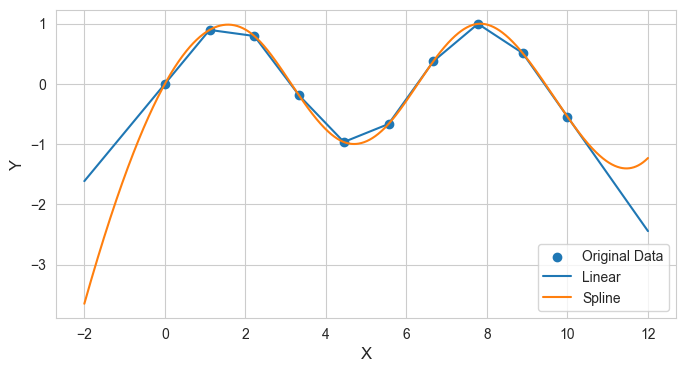

In [66]:
plt.scatter(x, y, label='Original Data')
plt.plot(x_fine2, y_linear_extrap, label='Linear')
plt.plot(x_fine2, y_spline_extrap, label='Spline')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()